In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from astropy.io import fits
import pickle

## Histogram of brightest pixels near object centers

In [2]:
# Read fits
direct_file = "/Users/keith/astr/research_astr/FOV0/direct/GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits"
direct_fits = fits.open(direct_file)
data = direct_fits[1].data
direct_fits.close()

# Read in HLSS catalog
hlss_cat = Table.read("/Users/keith/astr/research_astr/FOV0/catalogs/MOT_SCA1_roll_0_dither_0x_0y_cut_zcut.txt", format='ascii')

In [3]:
mag_bins = {}

for ii in np.arange(13.5, 28, 0.5):
    key = ii
    condition = (hlss_cat["MAG_F1500W"] >= ii) & (hlss_cat["MAG_F1500W"] < ii+0.5)
    value = hlss_cat[np.where(condition)]

    mag_bins[key] = value

In [4]:
brightest_pix = {}

xx, yy = np.ogrid[:4088, :4088]

ii=0
for key in mag_bins:
    jj = 0
    bin = mag_bins[key]
    coords = zip(bin["X_IMAGE"], bin["Y_IMAGE"])
    
    brightest_pix[key] = []
    for coord in coords:
        if len(coord) == 0:
            continue
        condition = ((abs(xx - (coord[0]-1)) < 5) & (abs(yy - (coord[1]-1)) < 5))
        relevant_pix = data[np.where(condition)]

        brightest_pix[key].append(np.max(relevant_pix)) 

        clear_output(wait=True)
        print("mag_bin: {0}; coord: {1}, total: {2}".format(key, jj, ii))
        ii+=1
        jj+=1

mag_bin: 27.5; coord: 152, total: 10762


In [5]:
# Save Dictionary
with open("brightest_pix_dict.pkl", 'wb') as f:
    pickle.dump(brightest_pix, f)

In [6]:
# Load dictionary
with open("brightest_pix_dict.pkl", 'rb') as f:
    brightest_pix = pickle.load(f)

In [7]:
num_bright_objects = 0

for key in brightest_pix:
    num_bright_objects += (np.asarray(brightest_pix[key]) > 0.30).sum() # find objects with brightest pix value beyond val

print("Number of bright objects: ", num_bright_objects)

Number of bright objects:  10763


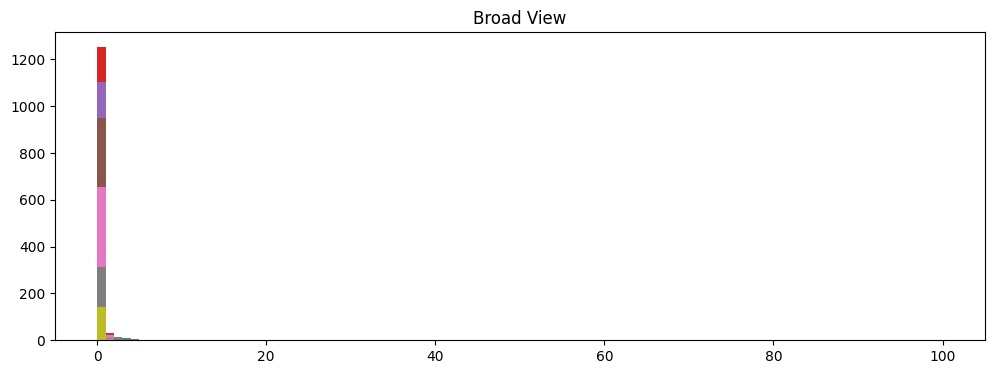

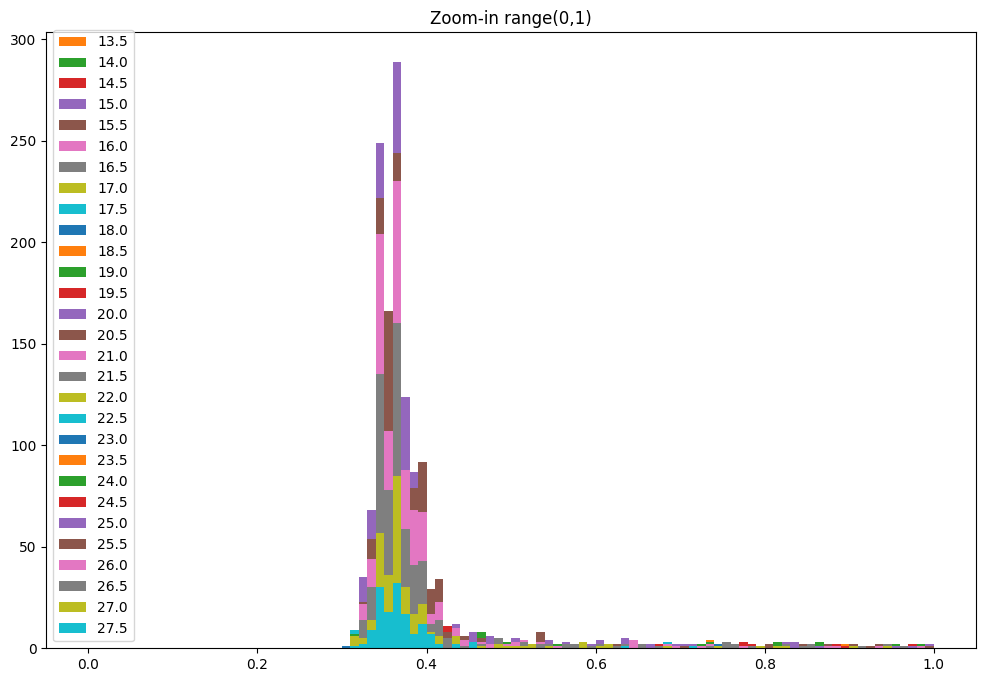

In [8]:
from matplotlib.pyplot import figure

figure(figsize=(12, 4))
for key in brightest_pix:
    plt.hist(brightest_pix[key], label=str(key), bins=100, range=(0,100))
plt.title("Broad View")
plt.show()

figure(figsize=(12, 8), dpi=100)

plt.hist([], bins=100, range=(0,1))
for key in brightest_pix:
    plt.hist(brightest_pix[key], label=str(key), bins=100, range=(0,1))

plt.title("Zoom-in range(0,1)")
plt.legend()
plt.show()

0.347517728805542


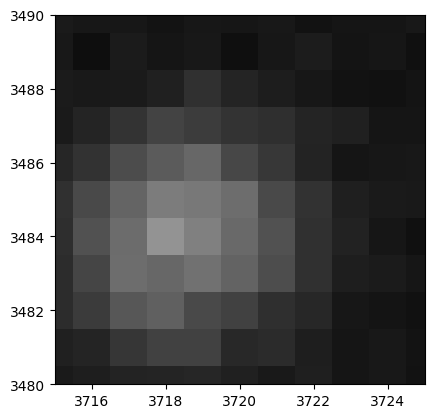

In [9]:
import matplotlib.pyplot as plt
from astropy.io import fits

data = fits.open("/Users/keith/astr/research_astr/FOV0/direct/GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits")[1].data
plt.imshow(data, origin='lower', vmin=0., vmax=3, cmap='grey')

plt.xlim(3715, 3725)
plt.ylim(3480, 3490)

print(data[3718, 3484])